In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/Final Year Research/data/garments_worker_productivity.csv')

In [ ]:
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
# change the data types
data['no_of_style_change'] = data['no_of_style_change'].astype(str)
data['team'] = data['team'].astype(str)
data['no_of_workers'] = data['no_of_workers'].apply(lambda x: int(x))


# Mispell corrections
data = data.replace(['finishing '], ['finishing'])
data = data.replace(['sweing'], ['sewing'])

# replacing null values
data['wip'].fillna(0 ,inplace=True)

# outlier correction
data.loc[data['targeted_productivity'] == 0.07, 'targeted_productivity'] = 0.7
data.loc[data['no_of_workers'] == 89, 'no_of_workers'] = 35

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   object 
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   object 
 13  no_of_workers          1197 non-null   int64  
 14  actual_productivity    1197 non-null   float64
dtypes: f

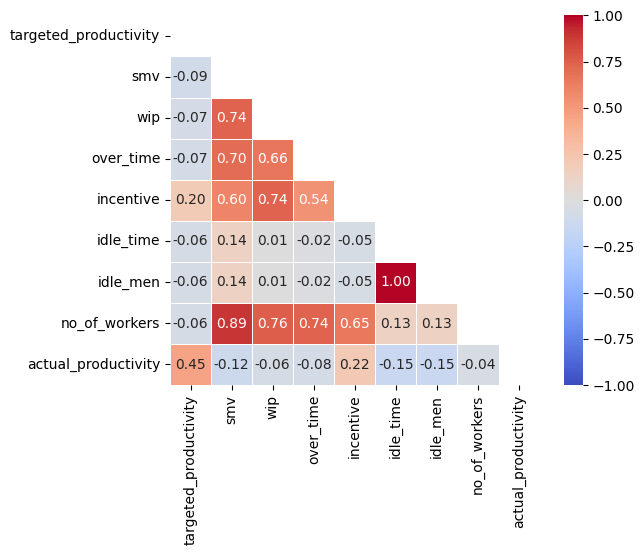

In [ ]:
numerical = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical = [feature for feature in data.columns if data[feature].dtype == 'O']

mask = np.triu(np.ones_like(data[numerical].corr(method = 'spearman'), dtype=bool))

dataplot = sns.heatmap(data[numerical].corr(method = 'spearman'),cmap = 'coolwarm',
                       vmin = -1, vmax = 1, center = 0, annot = True, fmt=".2f",
                       square=True, linewidths = 0.5, mask = mask)

# displaying heatmap
plt.show()

In [ ]:
data.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

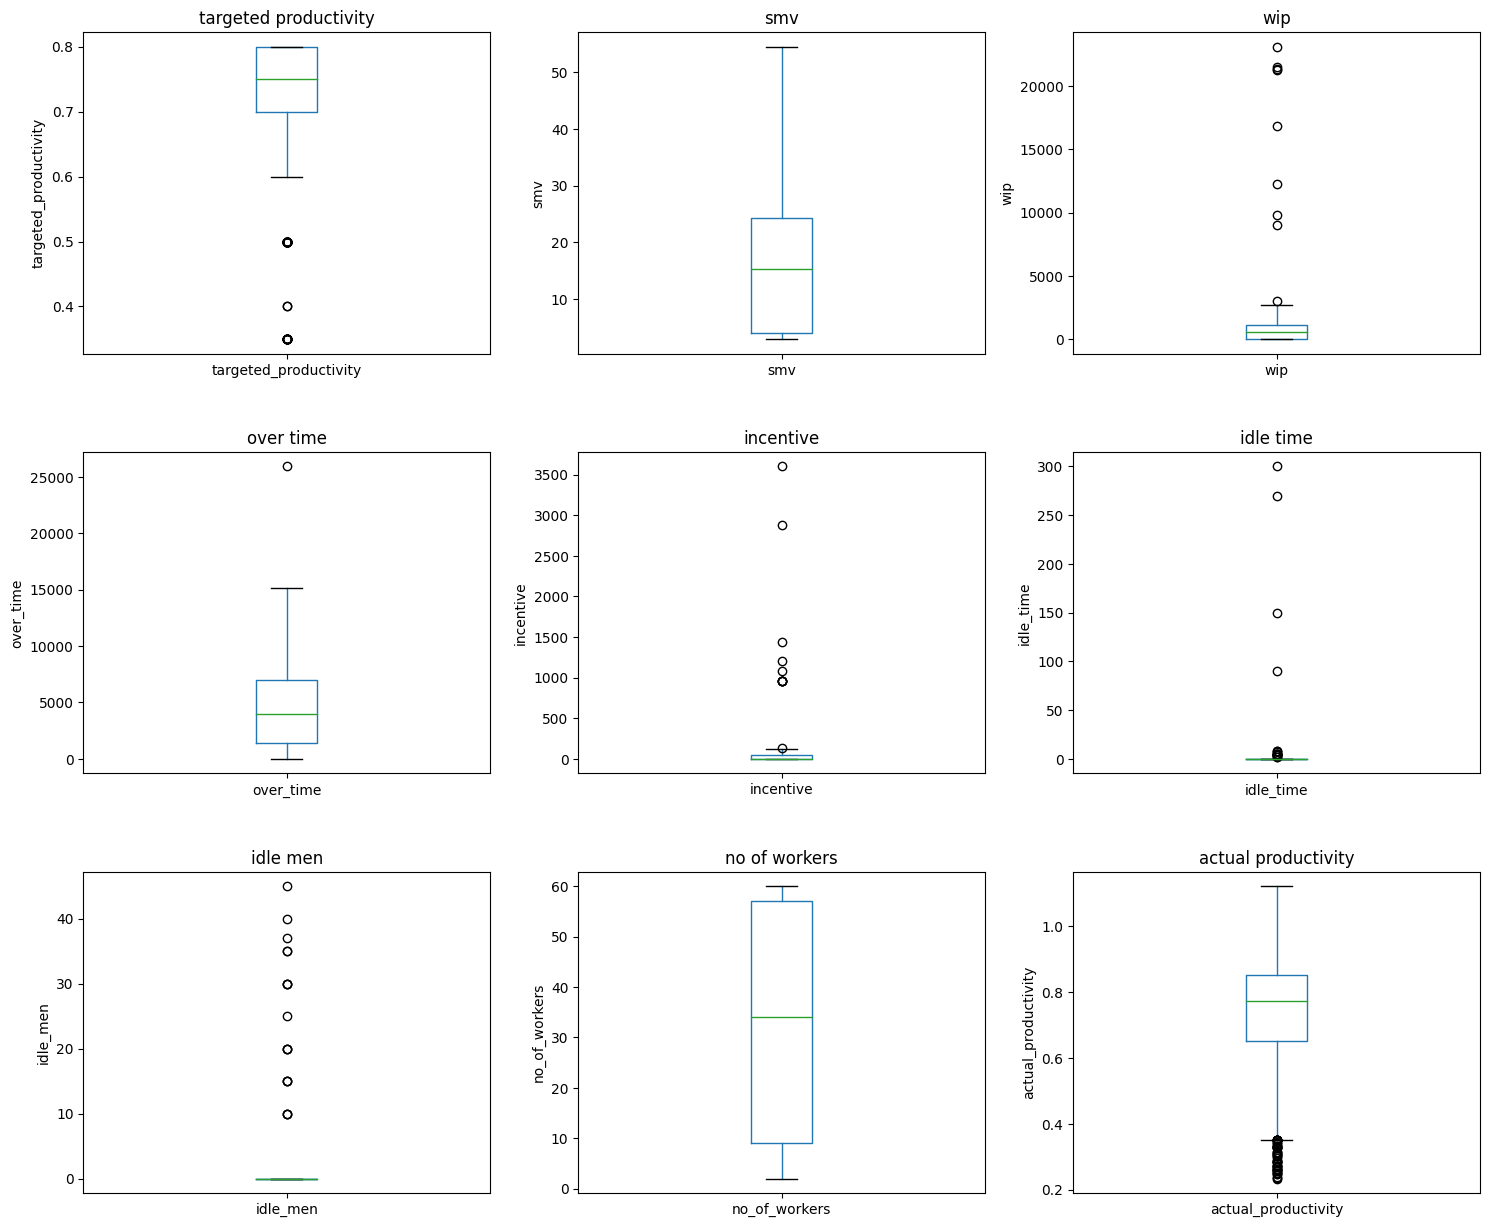

In [ ]:
categorical = ["quarter", "department", "day", "team", 'no_of_style_change']
numerical = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']

def title(x):
  return x.replace('_', ' ')

fig,axes = plt.subplots(nrows=3, ncols=3,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  data.boxplot(numerical[i], grid=False, ax=ax)
  ax.set_title(f"{title(numerical[i])}")
  ax.set_ylabel(numerical[i])


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

In [ ]:
# Function to detect and remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Iterate over numerical columns and remove outliers
new_data = data.copy()
for column in numerical:
    new_data = remove_outliers_iqr(new_data, column)

# Reset index
new_data = new_data.reset_index(drop=True)

# Display the dataset without outliers
new_data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010,3/11/2015,Quarter2,sewing,Wednesday,7,0.65,30.48,935.0,6840,26,0.0,0,1,57,0.650596
1011,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8,0.628333
1012,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8,0.625625
1013,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8,0.625625


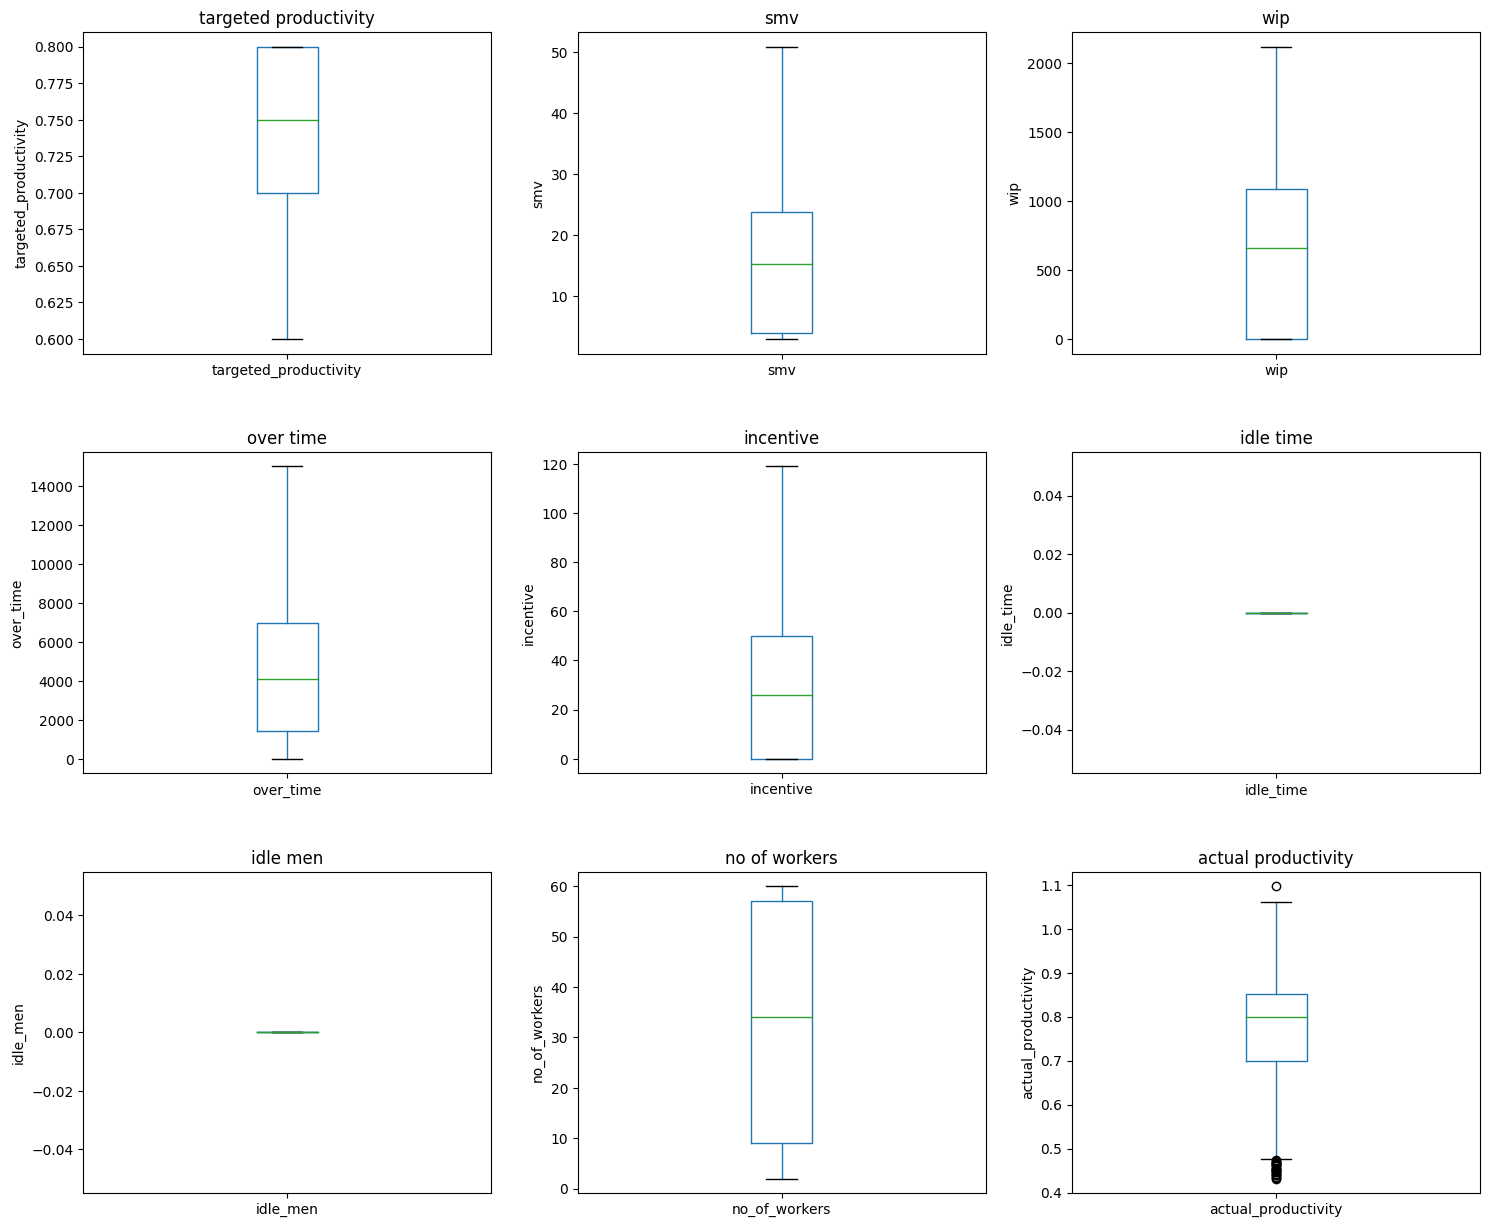

In [ ]:
# categorical = ["quarter", "department", "day", "team"]
# numerical = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']

def title(x):
  return x.replace('_', ' ')

fig,axes = plt.subplots(nrows=3, ncols=3,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  new_data.boxplot(numerical[i], grid=False, ax=ax)
  ax.set_title(f"{title(numerical[i])}")
  ax.set_ylabel(numerical[i])


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

In [ ]:
new_data.duplicated().sum()

0

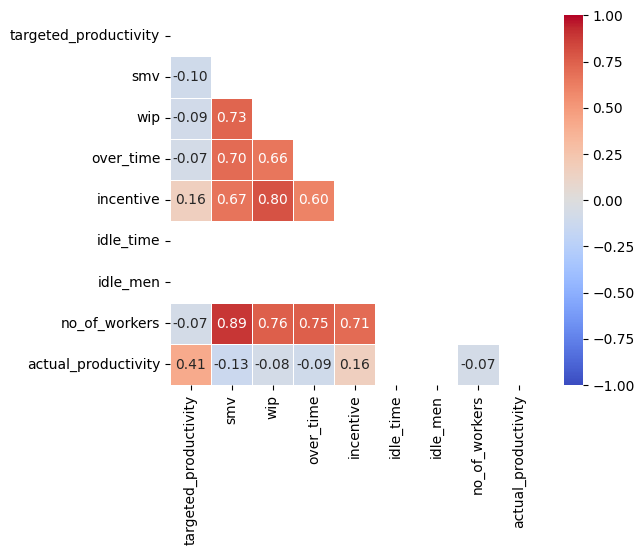

In [ ]:
mask = np.triu(np.ones_like(new_data[numerical].corr(method = 'spearman'), dtype=bool))

dataplot = sns.heatmap(new_data[numerical].corr(method = 'spearman'),cmap = 'coolwarm',
                       vmin = -1, vmax = 1, center = 0, annot = True, fmt=".2f",
                       square=True, linewidths = 0.5, mask = mask)

# displaying heatmap
plt.show()

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1015 non-null   object 
 1   quarter                1015 non-null   object 
 2   department             1015 non-null   object 
 3   day                    1015 non-null   object 
 4   team                   1015 non-null   object 
 5   targeted_productivity  1015 non-null   float64
 6   smv                    1015 non-null   float64
 7   wip                    1015 non-null   float64
 8   over_time              1015 non-null   int64  
 9   incentive              1015 non-null   int64  
 10  idle_time              1015 non-null   float64
 11  idle_men               1015 non-null   int64  
 12  no_of_style_change     1015 non-null   object 
 13  no_of_workers          1015 non-null   int64  
 14  actual_productivity    1015 non-null   float64
dtypes: f

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

## Machine Learning Models

In [ ]:
!pip install catboost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
categorical_cols = ['quarter', 'department', 'day', 'team', 'no_of_style_change']
numerical_cols = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'no_of_workers']

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False)
categorical_data = encoder.fit_transform(new_data[categorical_cols])

# Scale numerical columns
scaler = StandardScaler()
numerical_data = scaler.fit_transform(new_data[numerical_cols])

# Combine encoded categorical and scaled numerical data
X = np.concatenate([categorical_data, numerical_data], axis=1)
y = new_data['actual_productivity']

# Split data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
X_test.shape

(203, 34)

In [ ]:
# prompt: Need a method to evaluate mean absolute error, mean squared error, r2 value and adjusted r2 value

def model_evaluation(y_true, y_pred):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  n = len(y_true)
  p = 1  # Assuming only one predictor for simplicity, you can modify this if you have more.
  adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

  return mae, mse, r2, adjusted_r2

In [ ]:
# # evaluation metric after model training
# def model_evaluation(true, predicted):
#     mae = mean_absolute_error(true, predicted)
#     mse = mean_squared_error(true, predicted)
#     rmse = np.sqrt(mean_squared_error(true, predicted))
#     r2_square = r2_score(true, predicted)
#     return mae, rmse, r2_square

In [ ]:
# models = {
#     "Lasso": Lasso(alpha= 0.001),
#     "Ridge": Ridge(),
#     "K-Neighbors Regressor": KNeighborsRegressor(),
#     "Random Forest Regressor": RandomForestRegressor(),
#     "XGBRegressor": XGBRegressor(),
#     "CatBoosting Regressor": CatBoostRegressor(verbose=False),
#     "AdaBoost Regressor": AdaBoostRegressor()
# }
# model_list = []
# r2_list =[]

# for i in range(len(list(models))):
#     model = list(models.values())[i]
#     model.fit(X_train, y_train) # Train model

#     # Make predictions
#     y_train_pred = model.predict(X_train)
#     y_test_pred = model.predict(X_test)

#     # Evaluate Train and Test dataset
#     model_train_mae , model_train_rmse, model_train_r2 = model_evaluation(y_train, y_train_pred)

#     model_test_mae , model_test_rmse, model_test_r2 = model_evaluation(y_test, y_test_pred)


#     print(list(models.keys())[i])
#     model_list.append(list(models.keys())[i])

#     print('Model performance for Training set')
#     print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
#     print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
#     print("- R2 Score: {:.4f}".format(model_train_r2))

#     print('----------------------------------')

#     print('Model performance for Test set')
#     print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
#     print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
#     print("- R2 Score: {:.4f}".format(model_test_r2))
#     r2_list.append(model_test_r2)

#     print('='*35)
#     print('\n')

In [ ]:
# pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

In [ ]:
# # finetune the parameters of the random forest regressor

random_forest_regressor = RandomForestRegressor(
    # n_estimators=200,
    # max_depth = 20,
    # criterion='squared_error'
    n_estimators = 300 ,  random_state = 0
    )

random_forest_regressor.fit(X_train, y_train)

y_train_pred_RFR = random_forest_regressor.predict(X_train)
y_test_pred_RFR= random_forest_regressor.predict(X_test)

model_train_mae_RFR, model_train_rmse_RFR, model_train_r2_RFR, model_train_adj_r2_RFR = model_evaluation(y_train, y_train_pred_RFR)
model_test_mae_RFR , model_test_rmse_RFR, model_test_r2_RFR, model_test_adj_r2_RFR = model_evaluation(y_test, y_test_pred_RFR)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_RFR))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_RFR))
print("- R2 Score: {:.4f}".format(model_train_r2_RFR))
print("- Adjusted R2 Score: {:.4f}".format(model_train_adj_r2_RFR))

print('\nModel performance for Testing set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_RFR))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_RFR))
print("- R2 Score: {:.4f}".format(model_test_r2_RFR))
print("- Adjusted R2 Score: {:.4f}".format(model_test_adj_r2_RFR))

# Model performance for Training set
# - Root Mean Squared Error: 0.0564
# - Mean Absolute Error: 0.0370
# - R2 Score: 0.9207

# Model performance for Testing set
# - Root Mean Squared Error: 0.0969
# - Mean Absolute Error: 0.0637
# - R2 Score: 0.7635

Model performance for Training set
- Root Mean Squared Error: 0.0012
- Mean Absolute Error: 0.0212
- R2 Score: 0.9219
- Adjusted R2 Score: 0.9218

Model performance for Testing set
- Root Mean Squared Error: 0.0068
- Mean Absolute Error: 0.0508
- R2 Score: 0.6163
- Adjusted R2 Score: 0.6144


In [ ]:
print(random_forest_regressor.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [ ]:
# # # finetune the parameters of the random forest regressor

# random_forest_regressor = CatBoostRegressor(verbose=False,
#     learning_rate = 0.1,
#     iterations = 100,
#     depth=16,  # Adjust the tree depth
#     # l2_leaf_reg=2,  # Adjust the L2 regularization
#     # bootstrap_type='MVS',  # Adjust the bootstrap type
#     # subsample=0.8,  # Adjust the subsample ratio
#     # scale_pos_weight=1,  # Adjust the scale_pos_weight
#     loss_function='RMSE',  # Adjust the evaluation metric
#     )

# random_forest_regressor.fit(X_train, y_train)

# y_train_pred_RFR = random_forest_regressor.predict(X_train)
# y_test_pred_RFR= random_forest_regressor.predict(X_test)

# model_train_mae_RFR, model_train_rmse_RFR, model_train_r2_RFR, model_train_adj_r2_RFR = model_evaluation(y_train, y_train_pred_RFR)
# model_test_mae_RFR , model_test_rmse_RFR, model_test_r2_RFR, model_test_adj_r2_RFR = model_evaluation(y_test, y_test_pred_RFR)

# print('Model performance for Training set')
# print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_RFR))
# print("- Mean Absolute Error: {:.4f}".format(model_train_mae_RFR))
# print("- R2 Score: {:.4f}".format(model_train_r2_RFR))
# print("- Adjusted R2 Score: {:.4f}".format(model_train_adj_r2_RFR))

# print('\nModel performance for Testing set')
# print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_RFR))
# print("- Mean Absolute Error: {:.4f}".format(model_test_mae_RFR))
# print("- R2 Score: {:.4f}".format(model_test_r2_RFR))
# print("- Adjusted R2 Score: {:.4f}".format(model_test_adj_r2_RFR))

# # Model performance for Training set
# # - Root Mean Squared Error: 0.0564
# # - Mean Absolute Error: 0.0370
# # - R2 Score: 0.9207

# # Model performance for Testing set
# # - Root Mean Squared Error: 0.0969
# # - Mean Absolute Error: 0.0637
# # - R2 Score: 0.7635